Document Classification

1. Text pre-processing and exploration:

In [43]:
import os
import nltk
import sklearn
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from os import listdir
from os.path import isfile, join    
import sklearn.datasets as sk
import matplotlib.pyplot as plt



In [44]:
# here you should put the directory path
path='d:\\documents\\users\\nogahm\\Downloads\\ohsumed-first-20000-docs'

dirpath=path
trainDirs=[]
testDirs=[]
trainFiles=[]
testFiles=[]
# for table
Category=[]
FileName=[]
Path=[]
Text=[]
classNumOfDocs=[]
trainInfo=[] #[fileName,cleanText,class
testInfo=[]

stopWords=(stopwords.words('english'))
stopWords += {',','.',':',';','(',')','{','}','[',']','patients','+/-','may'}#set(String.punctuation)

In [45]:
# get train and test dirs
trainDirs=os.listdir(dirpath+'\\training')
testDirs=os.listdir(dirpath+'\\test')

In [48]:
# pre-process
def cleanText(text):
    # tokenize
    tokenized = word_tokenize(text)
    # remove stop words
    filtered_sentence = [w for w in tokenized if not w in stopWords]
    filtered_sentence = [w for w in filtered_sentence if len(w)>1]
    # stemming
    ps = PorterStemmer()
    index=0
    for i in range(len(filtered_sentence)-1):
        if len(text) > 1:
            try:
                filtered_sentence[index] = ps.stem(filtered_sentence[i])
            except Exception as inst:
                filtered_sentence[index]=filtered_sentence[i]
    return " ".join(filtered_sentence)


In [49]:
# get train and test dirs
for dir in trainDirs:
    for file in os.listdir(dirpath+'\\training\\'+dir):
        trainFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\training\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\training\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText=cleanText(text)
        trainInfo.append([file,cleanedText,dir,'training'])

for dir in testDirs:
    for file in os.listdir(dirpath+'\\test\\'+dir):
        testFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\test\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\test\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText = cleanText(text)
        testInfo.append([file, cleanedText, dir, 'test'])

# of categories:  23


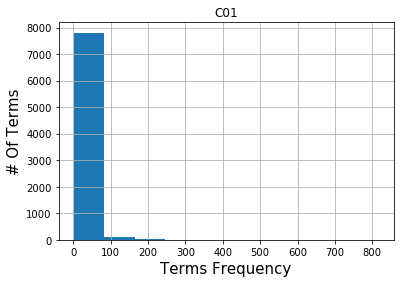

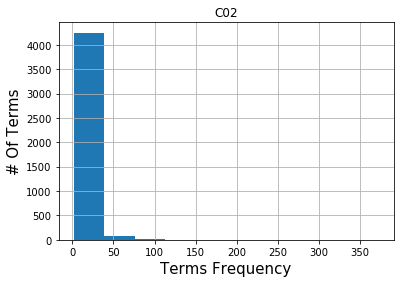

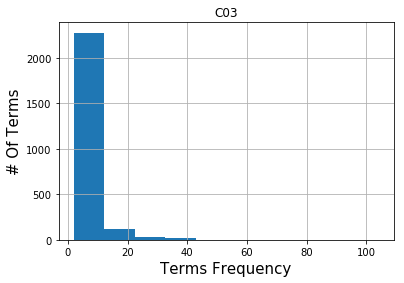

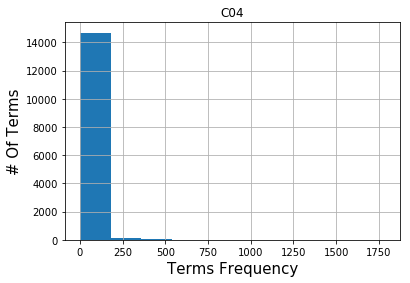

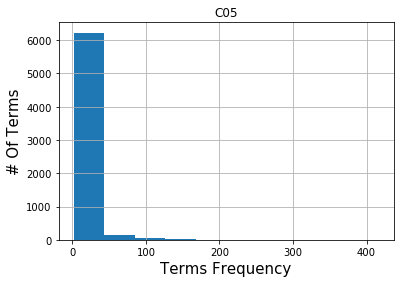

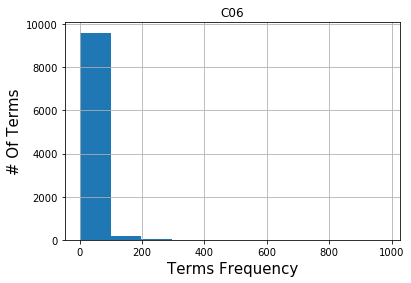

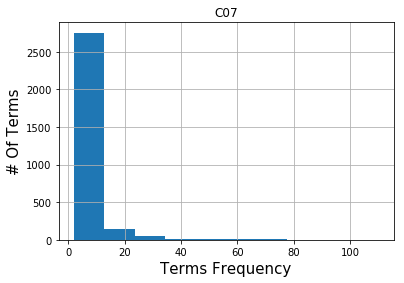

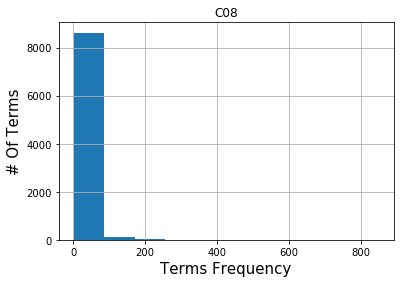

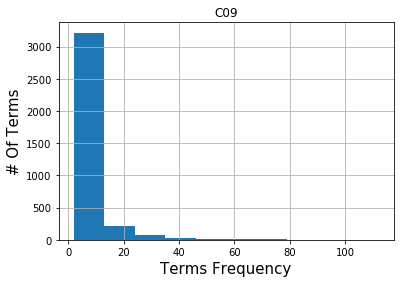

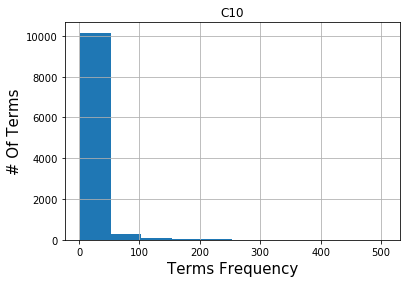

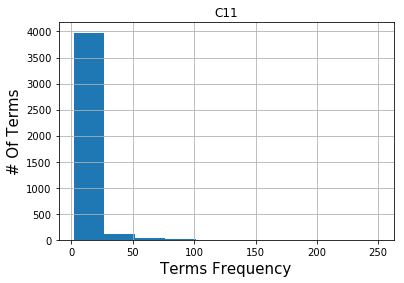

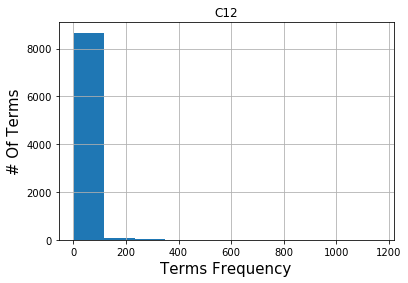

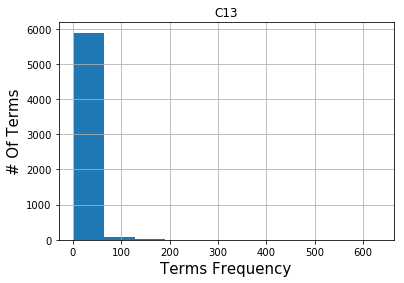

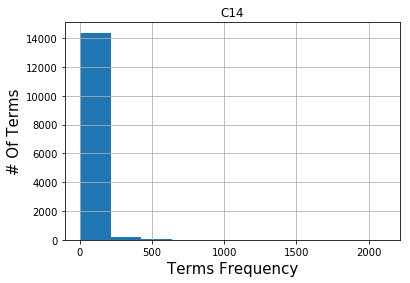

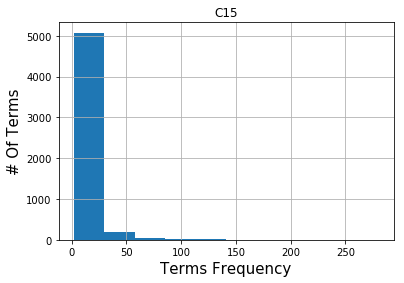

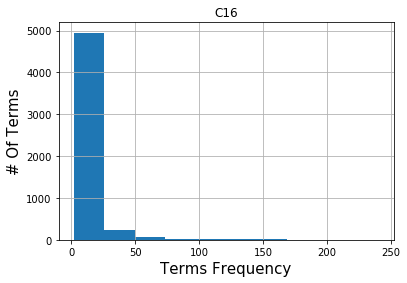

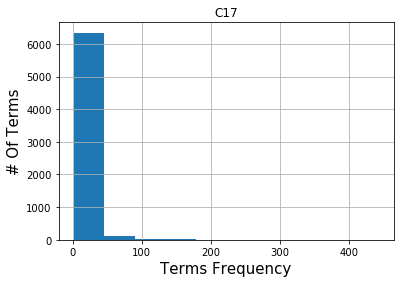

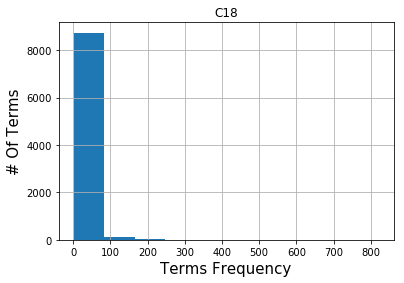

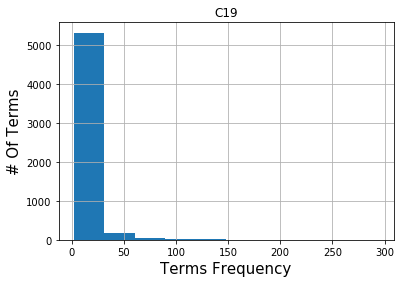

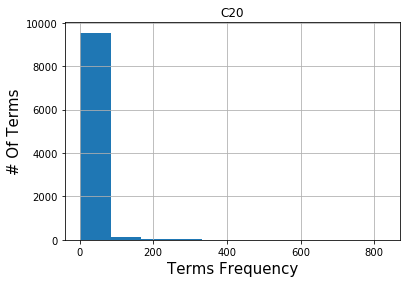

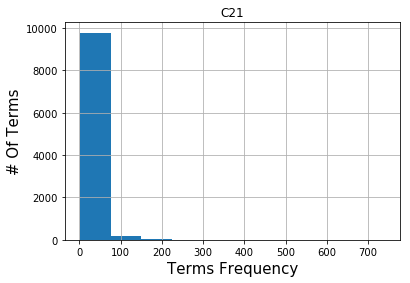

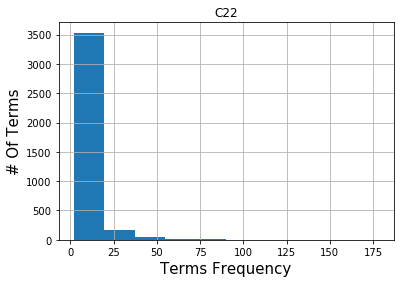

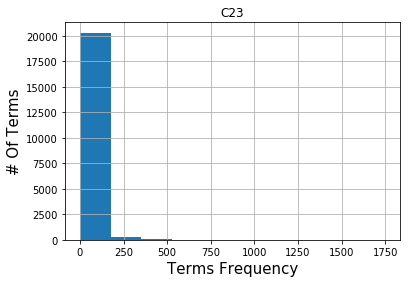

   Class  #OfFiles
0    C01       846
1    C02       316
2    C03       130
3    C04      2326
4    C05       566
5    C06      1176
6    C07       200
7    C08       946
8    C09       250
9    C10      1242
10   C11       324
11   C12       982
12   C13       562
13   C14      2498
14   C15       430
15   C16       400
16   C17       590
17   C18       776
18   C19       382
19   C20      1050
20   C21      1092
21   C22       184
22   C23      3598


,Class,term 1,term 2,term 3,term 4,term 5,term 6,term 7,term 8,term 9,term 10
0,C01,"(infection, 816)","(treatment, 516)","(disease, 392)","(group, 388)","(therapy, 342)","(less, 320)","(clinical, 312)","(cases, 308)","(infections, 300)","(children, 286)"
1,C02,"(infection, 372)","(virus, 360)","(human, 264)","(immunodeficiency, 202)","(hiv, 180)","(disease, 164)","(cells, 140)","(clinical, 130)","(aids, 120)","(two, 114)"
2,C03,"(infection, 104)","(disease, 86)","(treatment, 66)","(cases, 56)","(falciparum, 54)","(malaria, 52)","(levels, 46)","(therapy, 44)","(patient, 42)","(study, 42)"
3,C04,"(tumor, 1784)","(cancer, 1776)","(cells, 1724)","(cell, 1538)","(carcinoma, 1410)","(tumors, 1146)","(treatment, 1110)","(disease, 1006)","(cases, 982)","(one, 878)"
4,C05,"(bone, 416)","(treatment, 214)","(years, 210)","(results, 204)","(syndrome, 188)","(arthritis, 186)","(disease, 186)","(study, 184)","(one, 180)","(less, 170)"
5,C06,"(disease, 978)","(less, 626)","(treatment, 544)","(gastric, 528)","(two, 466)","(study, 452)","(one, 446)","(liver, 442)","(group, 438)","(patient, 416)"
6,C07,"(treatment, 110)","(periodontal, 88)","(disease, 74)","(gland, 72)","(primary, 72)","(dental, 70)","(parotid, 68)","(patient, 68)","(cells, 68)","(oral, 66)"
7,C08,"(lung, 848)","(pulmonary, 798)","(less, 536)","(disease, 500)","(respiratory, 464)","(group, 438)","(treatment, 424)","(patient, 348)","(study, 332)","(therapy, 296)"
8,C09,"(disease, 112)","(treatment, 110)","(ear, 110)","(nasal, 108)","(study, 100)","(hearing, 92)","(cases, 92)","(group, 92)","(one, 84)","(carcinoma, 82)"
9,C10,"(group, 506)","(pain, 496)","(less, 488)","(patient, 470)","(disease, 460)","(study, 418)","(clinical, 404)","(treatment, 388)","(cerebral, 380)","(results, 374)"


In [50]:
#get number of classes and number of docs for each class
docInfoDF=pd.DataFrame(trainInfo, columns=['fileName','cleanText','class','group'])
allClasses=np.unique(docInfoDF['class'])
print ('# of categories: ',allClasses.size)
numOfFiles=[]
words_per_class = []
termsFreqPerClass=[]
for currClass in allClasses:
    temp=(docInfoDF['class']).value_counts()[currClass]
    numOfFiles.append([currClass, temp])
    #get terms distibution
    currFiles=docInfoDF.loc[docInfoDF['class']==currClass]
    # get terms freq in currClass
    termsFreq=pd.Series(" ".join(currFiles['cleanText']).split()).value_counts()
    termsFreqDF = pd.DataFrame()
    termsFreqDF['term'] = termsFreq.index
    termsFreqDF['freq'] = list(termsFreq)
    #histograma
    fig = termsFreqDF.hist(column="freq")
    plt.title(currClass)
    plt.xlabel("Terms Frequency", fontsize=15)
    plt.ylabel("# Of Terms", fontsize=15)
    plt.show(fig)

    #get top 10
    termsFreq=termsFreq[:10]
    # termsFreqPerClass.append([currClass,zip(termsFreq.index,termsFreq)])
    zipedFreq=zip(termsFreq.index, termsFreq)
    zippedList=list(zipedFreq)
    termsFreqPerClass.append([currClass]+zippedList)

# print number of files prt category
numOfFilesDF=pd.DataFrame(numOfFiles,columns=['Class','#OfFiles'])
print(numOfFilesDF)
# print terms frequency
pd.DataFrame(termsFreqPerClass, columns=['Class','term 1','term 2','term 3','term 4','term 5','term 6','term 7','term 8','term 9','term 10'])

#### Challenges:
* There are words which common at most of the categories (such as.... ),that can effect the accurcy of the model.
* Finding the right parameters and understand their meaning in order to impprove the algorithem
* 

<h1> 2. Document classification: <h1>

feature extraction methods: TF-IDF, Bag Of Words
machine learning models: SVM, Naïve Bayes

In [51]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [52]:
# save best
best_accuracy = 0.0
best_fe = ''
best_classifier = ''
best_corpus_type = ''

In [53]:
train=docInfoDF.loc[docInfoDF['group']=='training']
trainSetText=train['cleanText'].tolist()
trainSetClass=train['class'].tolist()
test=pd.DataFrame(testInfo, columns=['fileName','cleanText','class','group'])
testSetText=train['cleanText'].tolist()
testSetClass=train['class'].tolist()

In [54]:
def classify(extractM,machineLearningM, parameters): 
            pipeline = Pipeline([('vect', extractM), ('clf', machineLearningM)])
            gs_clf = GridSearchCV(pipeline, parameters, n_jobs=1)
            gs_clf = gs_clf.fit(trainSetText, trainSetClass)
            prediction = gs_clf.predict(testSetText)
            accuracy = metrics.accuracy_score(testSetClass, prediction)
            print(accuracy)
            return [accuracy, gs_clf.best_params_]

In [55]:
results=[]
parameters = {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01, 0.1)}
#TF-IDF & SVM
print('TF-IDF AND SVM')
ans = classify(TfidfVectorizer(),SGDClassifier() ,parameters)
accuracy = ans[0]
params = ans[1]
results.append(['TF-IDF' , 'SVM', params,accuracy])


TF-IDF AND SVM
0.583245471101


In [56]:
#TF-IDF & Naïve Bayes
print('TF-IDF AND Naïve Bayes')
ans = classify(TfidfVectorizer(),MultinomialNB() ,parameters)
accuracy = ans[0]
params = ans[1]
results.append(['TF-IDF' , 'Naïve Bayes', params,accuracy])

TF-IDF AND Naïve Bayes
0.595226684559


In [ ]:
#Bag of Words & SVM
print('Bag of Words AND SVM')
ans = classify(CountVectorizer(),SGDClassifier() ,parameters)
accuracy = ans[0]
params = ans[1]
results.append(['Bag of Words' , 'SVM', params,accuracy])

Bag of Words AND SVM


In [ ]:
#Bag of Words & Naïve Bayes
print('Bag of Words AND Naïve Bayes')
ans = classify(CountVectorizer(),MultinomialNB() ,parameters)
accuracy = ans[0]
params = ans[1]
results.append(['Bag of Words' , 'Naïve Bayes',  params,accuracy])


In [ ]:
pd.DataFrame(results,columns=['extraction method','machine learning method','parameters', 'accuracy'])

change params and remove common words in pre-process

In [87]:
# pre process with more stop words
stopWords+=['disease','patient','infection','treatment','one','two','cases']
# get train and test dirs
for dir in trainDirs:
    for file in os.listdir(dirpath+'\\training\\'+dir):
        trainFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\training\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\training\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText=cleanText(text)
        trainInfo.append([file,cleanedText,dir,'training'])

for dir in testDirs:
    for file in os.listdir(dirpath+'\\test\\'+dir):
        testFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\test\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\test\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText = cleanText(text)
        testInfo.append([file, cleanedText, dir, 'test'])

In [89]:
parameters = {'vect__max_df': (0.05, 0.55, 0.05),'clf__alpha': (0.01, 0.11, 0.01)}
#TF-IDF & SVM
accuracy = classify(TfidfVectorizer(),SGDClassifier(),parameters)
results.append(['TF-IDF' , 'SVM', 'np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)',accuracy])

accuracy = classify(TfidfVectorizer(),MultinomialNB() ,parameters)
results.append(['TF-IDF' , 'Naïve Bayes','np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)', accuracy])

accuracy = classify(CountVectorizer(),SGDClassifier() ,parameters)
results.append(['Bag of Words' , 'SVM', 'np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)', accuracy])

accuracy = classify(CountVectorizer(),MultinomialNB() ,parameters)
results.append(['Bag of Words' , 'Naïve Bayes', 'np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)', accuracy])

pd.DataFrame(results,columns=['extraction method','machine learning method','max_df','alfa', 'accuracy'])


0.578165436595
0.593022141282
0.527556790952
0.57921978338


,extraction method,machine learning method,max_df,alfa,accuracy
0,TF-IDF,SVM,"(0.3,0.5)","(0.01, 0.1)",0.579028
1,TF-IDF,Naïve Bayes,"(0.3,0.5)","(0.01, 0.1)",0.593022
2,Bag of Words,SVM,"(0.3,0.5)","(0.01, 0.1)",0.508866
3,Bag of Words,Naïve Bayes,"(0.3,0.5)","(0.01, 0.1)",0.579507
4,TF-IDF,SVM,"np.arange(0.05, 0.55, 0.05)","np.arange(0.01, 0.11, 0.01)",0.579411
5,TF-IDF,Naïve Bayes,"np.arange(0.05, 0.55, 0.05)","np.arange(0.01, 0.11, 0.01)",0.590626
6,Bag of Words,SVM,"np.arange(0.05, 0.55, 0.05)","np.arange(0.01, 0.11, 0.01)",0.550657
7,Bag of Words,Naïve Bayes,"np.arange(0.05, 0.55, 0.05)","np.arange(0.01, 0.11, 0.01)",0.580658
8,TF-IDF,SVM,"np.arange(0.05, 0.55, 0.05)","np.arange(0.01, 0.11, 0.01)",0.578165
9,TF-IDF,Naïve Bayes,"np.arange(0.05, 0.55, 0.05)","np.arange(0.01, 0.11, 0.01)",0.593022


In [ ]:
print(df.loc[df['accuracy'].idxmax()])